# Synthetic Data


## Covariance and Variance

In [1]:
def mean(values):
	return sum(values) / float(len(values))

In [2]:
def covariance(x, mean_x, y, mean_y):
	covar = 0.0
	for i in range(len(x)):
		covar += (x[i] - mean_x) * (y[i] - mean_y)
	return covar

In [3]:
def variance(values, mean):
	return sum([(x-mean)**2 for x in values])

In [4]:
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
x = [row[0] for row in dataset]
y = [row[1] for row in dataset]

mean_x, mean_y = mean(x), mean(y)

covar = covariance(x, mean_x, y, mean_y)

print('Covariance between x and y: %.3f' % (covar))

Covariance between x and y: 8.000


In [5]:
# prompt: calculate variance of x with function above
var_x = variance(x, mean_x)
print('Variance of x: %.3f' % (var_x))

Variance of x: 10.000


## Estimate betas

In [6]:
# Calculate coefficients
def coefficients(dataset):
	x = [row[0] for row in dataset]
	y = [row[1] for row in dataset]
	x_mean, y_mean = mean(x), mean(y)
	b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
	b0 = y_mean - b1 * x_mean
	return [b0, b1]

# calculate coefficients
b0, b1 = coefficients(dataset)
print('Coefficients: B0=%.3f, B1=%.3f' % (b0, b1))

Coefficients: B0=0.400, B1=0.800


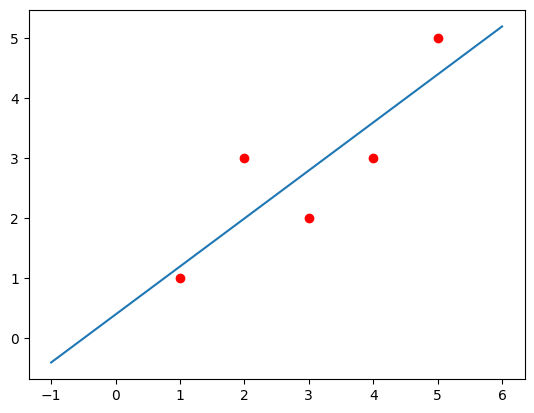

In [7]:
# prompt: plot the dataset and the linear function with b0 and b1
import matplotlib.pyplot as plt

# Plot the dataset
plt.scatter(x, y, color='red')

# Plot the linear function
x_vals = range(min(x)-2, max(x) + 2)
y_vals = [b0 + b1 * x_val for x_val in x_vals]
plt.plot(x_vals, y_vals)

# Show the plot
plt.show()

# Other methods & implementations (least square) for linear regression



In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Your dataset
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
x = np.array([row[0] for row in dataset]).reshape(-1, 1)
y = np.array([row[1] for row in dataset])

# Perform regression
model = LinearRegression().fit(x, y)

print(f"Coefficient (slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Coefficient (slope): 0.7999999999999999
Intercept: 0.3999999999999999


Sklearn use gradient opt for linearregression. Optionally, take a round on coefficents.

## Multidimensional Data

In [9]:
dataset = [
    [1, 2, 3],  # First row: x1=1, x2=2, y=3
    [2, 3, 6],  # Second row: x1=2, x2=3, y=6
    [3, 4, 7],  # and so on...
    [4, 5, 8],
    [5, 6, 11]
]


In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Extract independent and dependent variables
X = np.array([row[:2] for row in dataset])  # independent variables
y = np.array([row[2] for row in dataset])   # dependent variable

# Perform regression
model = LinearRegression().fit(X, y)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Coefficients: [0.9 0.9]
Intercept: 0.6999999999999993
